# **Assignment 1 PMS** 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


### **Question 1**
The data are tabulated into rows, one for each compound, and columns that include a common name, molecular weight, critical temperature (K), acentric factor, and the normal boiling point (K). Extract the data and place it into a matrix (array) AllData to use further on. 
 
#### Part (a) 
Extract the boiling points from the data and place them in a column vector. Similarly, extract the molecular weights in a second vector. Plot the normal boiling point as a function of the molecular weight of the compounds in the database. Fit a straight line through the data and find the R2 value.

In [124]:
data = pd.read_excel(r'data_file.xlsx')
data

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K)
0,1,(+)-a-pinene,136.23704,647.00,0.3410,428.65
1,2,(+)-camphene,136.23704,638.00,0.2960,432.65
2,3,(-)-a-pinene,136.23704,647.00,0.3410,429.35
3,4,(-)-b-citronellol,156.26820,656.59,0.6120,498.65
4,5,(-)-camphene,136.23704,638.00,0.2960,439.95
...,...,...,...,...,...,...
6026,6136,water,18.01528,647.13,0.3449,373.15
6027,6137,xylenes,106.16740,620.21,0.3170,413.15
6028,6142,zirconium bromide,410.84000,805.00,0.3100,633.15
6029,6143,zirconium chloride,233.03480,778.00,0.2980,604.15


In [3]:
column = ['name','molweight','boiling point (K)']

In [4]:
df = data[column]

In [5]:
df

,name,molweight,boiling point (K)
0,(+)-a-pinene,136.23704,428.65
1,(+)-camphene,136.23704,432.65
2,(-)-a-pinene,136.23704,429.35
3,(-)-b-citronellol,156.26820,498.65
4,(-)-camphene,136.23704,439.95
...,...,...,...
6026,water,18.01528,373.15
6027,xylenes,106.16740,413.15
6028,zirconium bromide,410.84000,633.15
6029,zirconium chloride,233.03480,604.15


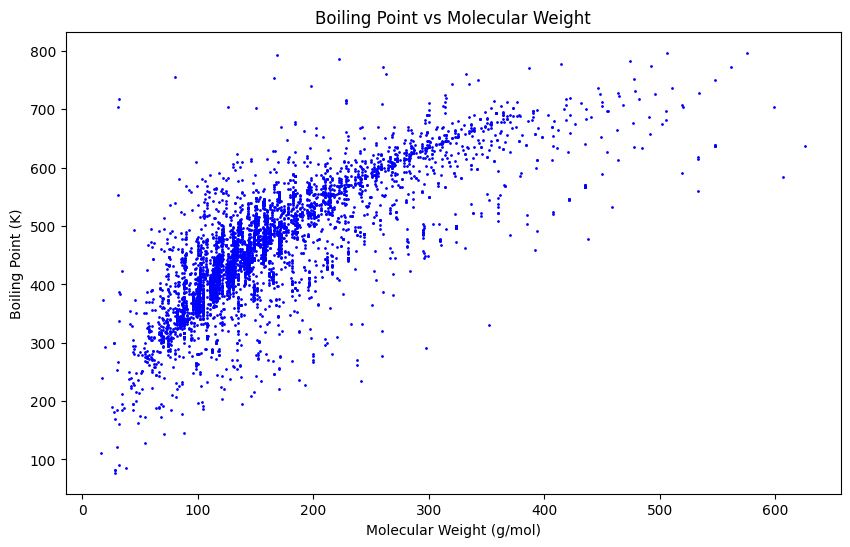

In [6]:
X = df['molweight']
Y = df['boiling point (K)']

# Ploting graph for getting insight about the relation between the molweight and boiling temperature

plt.figure(figsize=(10,6)) 
plt.scatter(X, Y, s=1,color='blue', label='Data Points')
plt.xlabel('Molecular Weight (g/mol)')
plt.ylabel('Boiling Point (K)')
plt.title('Boiling Point vs Molecular Weight')
plt.show()

# plt.scatter(X,Y)

In [7]:
x= X.to_numpy(float)
y = Y.to_numpy(float)

In [8]:
y=y.reshape(-1,1)
x= x.reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression()

LinearReg.fit(x,y)


LinearRegression()

In [10]:
pred = LinearReg.predict(x)

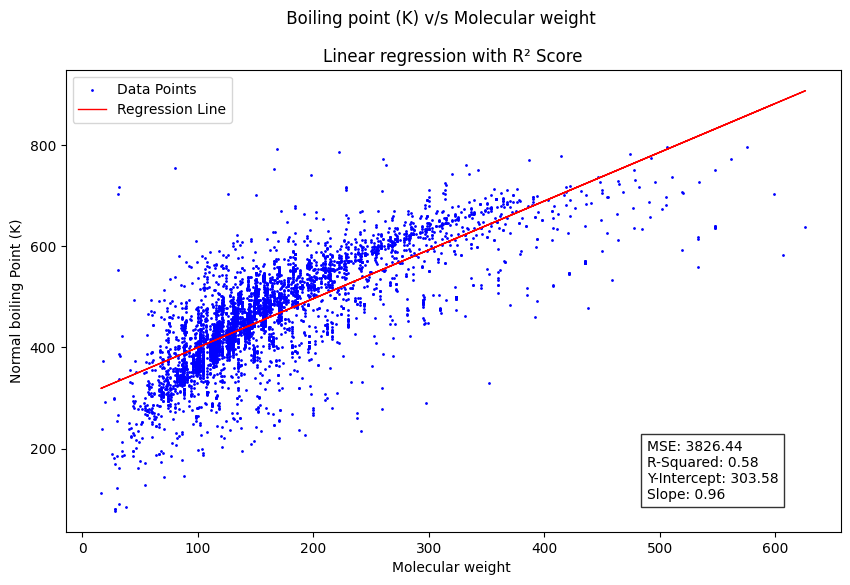

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y,pred)
r2_e = r2_score(y,pred)
textstr = f"MSE: {mse:.2f}\nR-Squared: {r2_e:.2f}\nY-Intercept: {LinearReg.intercept_[0]:.2f}\nSlope: {LinearReg.coef_[0][0]:.2f}"

plt.figure(figsize=(10,6)) 
plt.scatter(X, Y, s=1,color='blue', label='Data Points',)
plt.plot(x,pred, color='red', linewidth=1, label='Regression Line')
plt.text(0.75, 0.2, textstr, transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.title("Linear regression with R² Score")
plt.suptitle(" Boiling point (K) v/s Molecular weight ")
plt.xlabel("Molecular weight ")
plt.ylabel("Normal boiling Point (K)")
plt.legend()

In [12]:
#Results
# Add Text Annotations
# textstr = f"Mean Squared Error: {mse:.4f}\nR-Squared: {r2_e:.4f}\nY-Intercept: {LinearReg.intercept_[0]:.2f}\nSlope: {LinearReg.coef_[0][0]:.2f}"
# plt.text(0.05, 0.85, textstr, transform=plt.gca().transAxes, fontsize=12, 
#          verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

print("Mean Squared Error : ", mse)
print("R-Squared :" , r2_e)
print("Y-intercept :" , LinearReg.intercept_[0])
print("Slope :" , LinearReg.coef_[0][0])

Mean Squared Error :  3826.4376887251274
R-Squared : 0.5799762792252354
Y-intercept : 303.5846222149048
Slope : 0.9640039241292739


#### part (b) 
While we could use all the data we have to produce a meaningful correlation, let us assume that not all 
of the data were available. We will select a training set, or set of data that will be used to inform our ML 
algorithm. Extract from AllData 100 random data compounds. Using these selected compounds, build a 
100 × 3 matrix, which we call X, where each row corresponds to a training example (i.e., the data for a 
given compound). For each one of these rows the first column is the number 1 (corresponding to x0) and 
the next two columns correspond to the values of x1 and x2 (**molecular weight and acentric factor**).
Create another column matrix y with all the corresponding expected results; i.e., each of the elements of the 
vector is the expected **reduced boiling point (Tb/ Tc)** of each training example. The resulting 𝒚 vector is a 
100 × 1 vector. The “solution” of this problem can be found directly as 
                                
                                𝜽=(𝑿𝑻𝑿)−𝟏 𝑿𝑻 𝒚  
                    
Calculate the values of the coefficients 𝜃0, 𝜃1 and 𝜃2, to evaluate the quality of the correlation. 

In [13]:
data.head()

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K)
0,1,(+)-a-pinene,136.23704,647.00,0.341,428.65
1,2,(+)-camphene,136.23704,638.00,0.296,432.65
2,3,(-)-a-pinene,136.23704,647.00,0.341,429.35
3,4,(-)-b-citronellol,156.26820,656.59,0.612,498.65
4,5,(-)-camphene,136.23704,638.00,0.296,439.95


In [14]:
data['reduced_boiling_point (Tb/Tc)'] = data['boiling point (K)']/data['critical temperature (K)']


In [15]:
df_2= data[['name', 'molweight', 'acentric factor','reduced_boiling_point (Tb/Tc)']]

In [16]:
data_q2=  df_2.sample(n=100,random_state=42)

In [17]:
data_q2.insert(1, 'bias',1)

In [18]:
data_q2

,name,bias,molweight,acentric factor,reduced_boiling_point (Tb/Tc)
1870,"2,4,4-trimethyl-2-pentanol",1,130.23032,0.639,0.723412
2584,2-methyl-5-nonanone,1,156.26820,0.612,0.725948
1328,1-phenylnaphthalene,1,204.27128,0.531,0.715135
5083,isopropyl octanoate,1,186.29448,0.639,0.751120
3413,3-nonanone,1,142.24132,0.541,0.735567
...,...,...,...,...,...
1487,"2,2,4-trimethyl-4-heptanol",1,158.28408,0.724,0.745095
408,"1,1-diphenyl-1-tetradecene",1,348.57184,0.804,0.801102
2707,2-pentadecanone,1,226.40260,0.787,0.780896
2890,"3,4,5-trimethylphenol",1,136.19368,0.494,0.689426


In [19]:
X = np.array(data_q2[['bias','molweight', 'acentric factor']])
y = np.array(data_q2[['reduced_boiling_point (Tb/Tc)']])

In [20]:
X

array([[1.00000000e+00, 1.30230320e+02, 6.39000000e-01],
       [1.00000000e+00, 1.56268200e+02, 6.12000000e-01],
       [1.00000000e+00, 2.04271280e+02, 5.31000000e-01],
       [1.00000000e+00, 1.86294480e+02, 6.39000000e-01],
       [1.00000000e+00, 1.42241320e+02, 5.41000000e-01],
       [1.00000000e+00, 1.96030930e+02, 2.61000000e-01],
       [1.00000000e+00, 1.70338440e+02, 4.32000000e-01],
       [1.00000000e+00, 1.70338440e+02, 5.19000000e-01],
       [1.00000000e+00, 1.40268800e+02, 4.57000000e-01],
       [1.00000000e+00, 1.42284680e+02, 3.97000000e-01],
       [1.00000000e+00, 9.05522800e+01, 2.42000000e-01],
       [1.00000000e+00, 1.50309160e+02, 3.70000000e-01],
       [1.00000000e+00, 6.61478800e+01, 3.66000000e-01],
       [1.00000000e+00, 1.62229120e+02, 6.81000000e-01],
       [1.00000000e+00, 1.26241920e+02, 3.34000000e-01],
       [1.00000000e+00, 1.12215040e+02, 3.39000000e-01],
       [1.00000000e+00, 1.46659800e+02, 4.30000000e-01],
       [1.00000000e+00, 1.14187

In [21]:
# Calculating Theta using the Normal Equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

In [22]:
theta

array([[5.95796567e-01],
       [2.01872653e-04],
       [1.54616024e-01]])

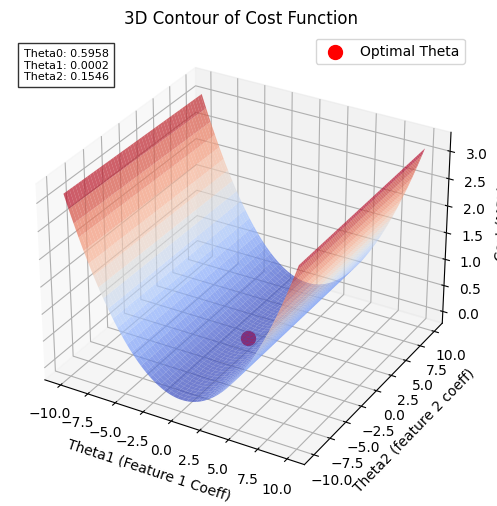

In [23]:
theta_optimal = theta
# Create a range of theta values to visualize loss
theta0_vals = np.linspace(-10, 10, 100)  # Range for theta0
theta1_vals = np.linspace(-10, 10, 100)  # Range for t
# Compute Loss (Mean Squared Error) for each theta combination
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_test = np.array([[theta0_vals[i]], [theta1_vals[j]], [theta_optimal[2, 0]]])
        y_pred = X @ theta_test  # Compute Predictions
        J_vals[i, j] = ((y_pred - y) ** 2).mean()  # MSE Loss

# Convert to Meshgrid for 3D Plot
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Create 3D Contour Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# Plot the loss surface
ax.plot_surface(T0, T1, J_vals, cmap="coolwarm", alpha=0.7)

# Highlight the Optimal Theta
ax.scatter(theta_optimal[1], theta_optimal[2], np.min(J_vals), color="red", marker="o", s=100, label="Optimal Theta")

# Labels and Titles
ax.set_ylabel("Theta2 (feature 2 coeff)")
ax.set_xlabel("Theta1 (Feature 1 Coeff)")
ax.set_zlabel("Cost (MSE)")
ax.set_title("3D Contour of Cost Function")
ax.legend()

# **Add Theta Values as a Text Box in the 3D Plot**
textstr = f"Theta0: {theta_optimal[0,0]:.4f}\nTheta1: {theta_optimal[1,0]:.4f}\nTheta2: {theta_optimal[2,0]:.4f}"
ax.text2D(0.15, 0.8, textstr, transform=fig.transFigure, fontsize=8, 
          bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.show()

Optimal Theta:
[5.95796567e-01 2.01872653e-04 1.54616024e-01]
R-Squared: 0.7861
Mean Squared Error: 0.0004


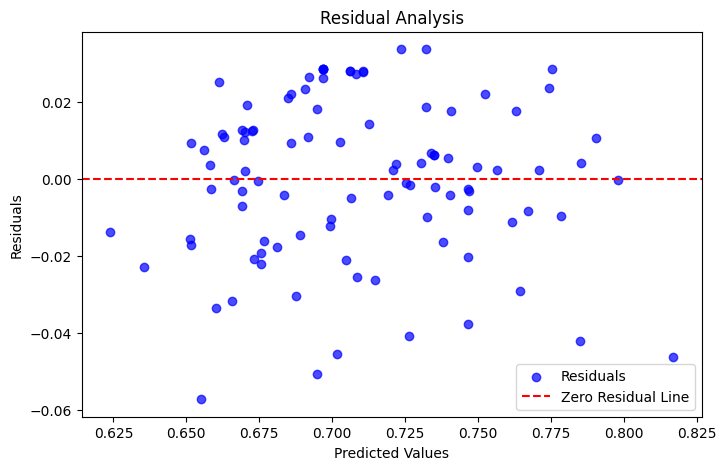

In [24]:
# Predict using Theta
y_pred = X @ theta_optimal

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Print Evaluation Metrics
print(f"Optimal Theta:\n{theta_optimal.ravel()}")
print(f"R-Squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# **Plot Residual Analysis**
residuals = y - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7, label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.legend()
plt.show()


In [25]:
data

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K),reduced_boiling_point (Tb/Tc)
0,1,(+)-a-pinene,136.23704,647.00,0.3410,428.65,0.662519
1,2,(+)-camphene,136.23704,638.00,0.2960,432.65,0.678135
2,3,(-)-a-pinene,136.23704,647.00,0.3410,429.35,0.663601
3,4,(-)-b-citronellol,156.26820,656.59,0.6120,498.65,0.759454
4,5,(-)-camphene,136.23704,638.00,0.2960,439.95,0.689577
...,...,...,...,...,...,...,...
6026,6136,water,18.01528,647.13,0.3449,373.15,0.576623
6027,6137,xylenes,106.16740,620.21,0.3170,413.15,0.666145
6028,6142,zirconium bromide,410.84000,805.00,0.3100,633.15,0.786522
6029,6143,zirconium chloride,233.03480,778.00,0.2980,604.15,0.776542


#### **Part c**
From the matrix AllData retrieve two column vectors, one called InputData, which will have two 
columns, the MW and the acentric factor of all the data in the original set and a second matrix called 
TargetData which contains the reduced boiling point data. 
Develop a neural network for this data, and train the network, using only 10% of the data. Present the 
results of the output.

In [26]:
InputData = data[['molweight','acentric factor']]
TargetData = data[['reduced_boiling_point (Tb/Tc)']]

In [81]:
TargetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reduced_boiling_point (Tb/Tc)  6031 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [83]:
InputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   molweight        6031 non-null   float64
 1   acentric factor  6031 non-null   float64
dtypes: float64(2)
memory usage: 94.4 KB


Epoch 1/100


C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3690 - mae: 0.5825 - val_loss: 0.2350 - val_mae: 0.4493
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2049 - mae: 0.4183 - val_loss: 0.1392 - val_mae: 0.3383
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1231 - mae: 0.3167 - val_loss: 0.0806 - val_mae: 0.2476
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0689 - mae: 0.2253 - val_loss: 0.0516 - val_mae: 0.1903
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0442 - mae: 0.1743 - val_loss: 0.0391 - val_mae: 0.1630
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0318 - mae: 0.1464 - val_loss: 0.0323 - val_mae: 0.1475
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0266 - mae: 0.1331 - val_loss: 0.0265 - val_mae: 0.1332
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0224 - mae: 0.1234 - val_loss: 0.0214 - val_mae: 0.1195
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0175 - ma

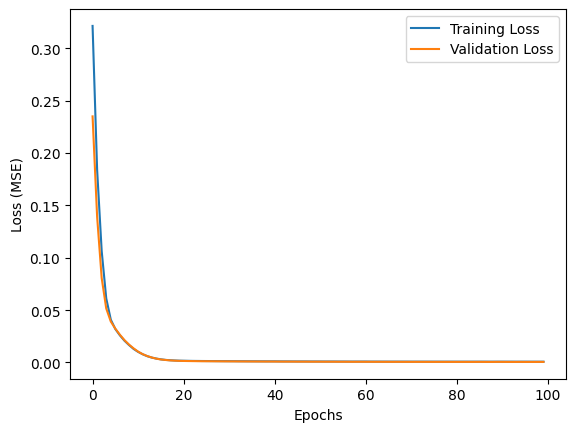

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
First 5 Predictions: [0.71246    0.7118204  0.72364944 ... 0.6783691  0.6666786  0.7253986 ]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize input features
scaler = StandardScaler()
InputData = scaler.fit_transform(InputData)

# Split the data (10% training, 90% testing)
X_train, X_test, y_train, y_test = train_test_split(InputData, TargetData, test_size=0.9, random_state=42)

# Define the Neural Network model
def create_model(hidden_layers=1, neurons_per_layer=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(2,)))  # Input layer
    
    for _ in range(hidden_layers - 1):  # Adding hidden layers
        model.add(keras.layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer for regression
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create and train the model
model = create_model(hidden_layers=1, neurons_per_layer=32)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:].flatten())


In [92]:
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:].flatten())

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
First 5 Predictions: [0.71246    0.7118204  0.72364944 ... 0.6783691  0.6666786  0.7253986 ]


In [93]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389 (1.52 KB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260 (1.02 KB)

In [ ]:
# Create and train the model
model = create_model(hidden_layers=1, neurons_per_layer=32)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')



In [137]:
min_loss = 10000
min_mae = 10000
best_parameters = {'hidden_layers': [], 'neurons_per_layer': [], 'min_loss': [], "min_mae":[]}
param_grid ={'hidden_layers': [1, 2, 3, 4], 'neurons_per_layer': [16, 32, 64]}
for layer in param_grid['hidden_layers']:
    for neuron_per_layer in param_grid['neurons_per_layer']:
      print("#"*100)
      print(f'\tFor Layers = {layer} \nFor Neuron_per_layers = {neuron_per_layer}')
      # Create and train the model  
      model = create_model(hidden_layers=1, neurons_per_layer=32)
      history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)
      # Evaluate the model
      loss, mae = model.evaluate(X_test, y_test)
      print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')
      if loss < min_loss:
        min_loss = loss
        min_mae = mae
        best_parameters = {'hidden_layers': layer, 'neurons_per_layer': neuron_per_layer,'min_loss': min_loss, "min_mae":min_mae }

print(f"Best Parameters:\n"
      f"Hidden Layers: {best_parameters['hidden_layers']}\n"
      f"Neurons per Layer: {best_parameters['neurons_per_layer']}\n"
      f"Minimum Loss: {best_parameters['min_loss']}\n"
      f"Minimum MAE: {best_parameters['min_mae']}")

####################################################################################################
	For Layers = 1 
For Neuron_per_layers = 16


C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.5276 - mae: 0.6864 - val_loss: 0.3308 - val_mae: 0.5316
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2863 - mae: 0.4848 - val_loss: 0.1861 - val_mae: 0.3853
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1641 - mae: 0.3612 - val_loss: 0.1134 - val_mae: 0.2922
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1034 - mae: 0.2764 - val_loss: 0.0765 - val_mae: 0.2321
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0670 - mae: 0.2155 - val_loss: 0.0571 - val_mae: 0.1966
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0539 - mae: 0.1908 - val_loss: 0.0457 - val_mae: 0.1748
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mae: 0.1579 - val_loss: 0.0370 - val_mae: 0.1564
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0325 - mae: 0.1481 - val_loss: 0.0292 - val_mae: 0.1383
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - l

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.7913 - mae: 0.8532 - val_loss: 0.5155 - val_mae: 0.6962
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4522 - mae: 0.6519 - val_loss: 0.2882 - val_mae: 0.5221
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2499 - mae: 0.4875 - val_loss: 0.1652 - val_mae: 0.3850
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1444 - mae: 0.3606 - val_loss: 0.1012 - val_mae: 0.2843
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0793 - mae: 0.2545 - val_loss: 0.0681 - val_mae: 0.2168
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0571 - mae: 0.2016 - val_loss: 0.0491 - val_mae: 0.1767
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0348 - mae: 0.1543 - val_loss: 0.0378 - val_mae: 0.1527
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0294 - mae: 0.1386 - val_loss: 0.0297 - val_mae: 0.1363
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0236 -

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.4701 - mae: 0.6409 - val_loss: 0.3102 - val_mae: 0.5163
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2726 - mae: 0.4824 - val_loss: 0.1768 - val_mae: 0.3876
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1515 - mae: 0.3612 - val_loss: 0.0982 - val_mae: 0.2823
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0857 - mae: 0.2643 - val_loss: 0.0571 - val_mae: 0.2054
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0491 - mae: 0.1895 - val_loss: 0.0385 - val_mae: 0.1628
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0315 - mae: 0.1473 - val_loss: 0.0303 - val_mae: 0.1437
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0248 - mae: 0.1296 - val_loss: 0.0248 - val_mae: 0.1293
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0210 - mae: 0.1192 - val_loss: 0.0204 - val_mae: 0.1164
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.4705 - mae: 0.6784 - val_loss: 0.2822 - val_mae: 0.5137
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2432 - mae: 0.4722 - val_loss: 0.1537 - val_mae: 0.3668
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1301 - mae: 0.3334 - val_loss: 0.0921 - val_mae: 0.2710
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0775 - mae: 0.2450 - val_loss: 0.0605 - val_mae: 0.2106
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0528 - mae: 0.1959 - val_loss: 0.0448 - val_mae: 0.1780
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0407 - mae: 0.1699 - val_loss: 0.0351 - val_mae: 0.1556
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0325 - mae: 0.1501 - val_loss: 0.0279 - val_mae: 0.1376
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0251 - mae: 0.1310 - val_loss: 0.0223 - val_mae: 0.1221
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.4451 - mae: 0.6374 - val_loss: 0.2706 - val_mae: 0.4965
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2384 - mae: 0.4668 - val_loss: 0.1409 - val_mae: 0.3490
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1230 - mae: 0.3242 - val_loss: 0.0786 - val_mae: 0.2435
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0662 - mae: 0.2226 - val_loss: 0.0531 - val_mae: 0.1899
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0472 - mae: 0.1778 - val_loss: 0.0430 - val_mae: 0.1674
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0398 - mae: 0.1606 - val_loss: 0.0365 - val_mae: 0.1530
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0335 - mae: 0.1469 - val_loss: 0.0307 - val_mae: 0.1402
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0268 - mae: 0.1319 - val_loss: 0.0255 - val_mae: 0.1274
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0208 -

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.6026 - mae: 0.7380 - val_loss: 0.4035 - val_mae: 0.6052
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3426 - mae: 0.5536 - val_loss: 0.2214 - val_mae: 0.4393
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1873 - mae: 0.3986 - val_loss: 0.1204 - val_mae: 0.3098
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1035 - mae: 0.2841 - val_loss: 0.0743 - val_mae: 0.2368
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0620 - mae: 0.2133 - val_loss: 0.0537 - val_mae: 0.1989
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0476 - mae: 0.1863 - val_loss: 0.0425 - val_mae: 0.1753
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0390 - mae: 0.1689 - val_loss: 0.0344 - val_mae: 0.1560
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0303 - mae: 0.1445 - val_loss: 0.0278 - val_mae: 0.1393
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.7249 - mae: 0.8114 - val_loss: 0.4839 - val_mae: 0.6651
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.4068 - mae: 0.6130 - val_loss: 0.2714 - val_mae: 0.4943
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2476 - mae: 0.4693 - val_loss: 0.1511 - val_mae: 0.3554
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1290 - mae: 0.3273 - val_loss: 0.0936 - val_mae: 0.2575
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0777 - mae: 0.2368 - val_loss: 0.0686 - val_mae: 0.2022
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0515 - mae: 0.1775 - val_loss: 0.0561 - val_mae: 0.1774
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0428 - mae: 0.1594 - val_loss: 0.0483 - val_mae: 0.1645
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0351 - mae: 0.1481 - val_loss: 0.0424 - val_mae: 0.1545
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.3138 - mae: 0.5389 - val_loss: 0.2044 - val_mae: 0.4195
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1742 - mae: 0.3794 - val_loss: 0.1270 - val_mae: 0.3141
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1181 - mae: 0.2991 - val_loss: 0.0838 - val_mae: 0.2453
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0716 - mae: 0.2270 - val_loss: 0.0612 - val_mae: 0.2077
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0541 - mae: 0.1946 - val_loss: 0.0476 - val_mae: 0.1807
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0424 - mae: 0.1695 - val_loss: 0.0377 - val_mae: 0.1604
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0331 - mae: 0.1495 - val_loss: 0.0302 - val_mae: 0.1427
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0271 - mae: 0.1357 - val_loss: 0.0244 - val_mae: 0.1277
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3761 - mae: 0.5886 - val_loss: 0.2446 - val_mae: 0.4525
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2112 - mae: 0.4097 - val_loss: 0.1405 - val_mae: 0.3225
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1192 - mae: 0.2984 - val_loss: 0.0941 - val_mae: 0.2609
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0829 - mae: 0.2439 - val_loss: 0.0695 - val_mae: 0.2241
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0673 - mae: 0.2224 - val_loss: 0.0511 - val_mae: 0.1920
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0488 - mae: 0.1861 - val_loss: 0.0377 - val_mae: 0.1642
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0334 - mae: 0.1537 - val_loss: 0.0277 - val_mae: 0.1396
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0243 - mae: 0.1315 - val_loss: 0.0204 - val_mae: 0.1190
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0173 -

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7611 - mae: 0.8625 - val_loss: 0.5292 - val_mae: 0.7214
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4612 - mae: 0.6734 - val_loss: 0.3002 - val_mae: 0.5421
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2571 - mae: 0.4977 - val_loss: 0.1635 - val_mae: 0.3912
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1428 - mae: 0.3632 - val_loss: 0.0894 - val_mae: 0.2792
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0758 - mae: 0.2515 - val_loss: 0.0520 - val_mae: 0.2050
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0472 - mae: 0.1950 - val_loss: 0.0337 - val_mae: 0.1601
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327 - mae: 0.1588 - val_loss: 0.0250 - val_mae: 0.1349
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0243 - mae: 0.1335 - val_loss: 0.0198 - val_mae: 0.1180
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - mae

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7889 - mae: 0.8293 - val_loss: 0.5561 - val_mae: 0.6956
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4829 - mae: 0.6529 - val_loss: 0.3288 - val_mae: 0.5353
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2925 - mae: 0.5059 - val_loss: 0.1894 - val_mae: 0.4020
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1672 - mae: 0.3768 - val_loss: 0.1103 - val_mae: 0.2977
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0935 - mae: 0.2729 - val_loss: 0.0699 - val_mae: 0.2266
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0573 - mae: 0.2028 - val_loss: 0.0506 - val_mae: 0.1831
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0382 - mae: 0.1641 - val_loss: 0.0410 - val_mae: 0.1581
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0376 - mae: 0.1496 - val_loss: 0.0344 - val_mae: 0.1424
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0238 -

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.5805 - mae: 0.7332 - val_loss: 0.4123 - val_mae: 0.6142
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3654 - mae: 0.5766 - val_loss: 0.2589 - val_mae: 0.4831
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2319 - mae: 0.4565 - val_loss: 0.1635 - val_mae: 0.3794
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1440 - mae: 0.3583 - val_loss: 0.1030 - val_mae: 0.2921
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0863 - mae: 0.2672 - val_loss: 0.0665 - val_mae: 0.2246
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0574 - mae: 0.2109 - val_loss: 0.0464 - val_mae: 0.1807
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0394 - mae: 0.1680 - val_loss: 0.0363 - val_mae: 0.1565
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0311 - mae: 0.1462 - val_loss: 0.0303 - val_mae: 0.1417
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0290 -

### **Best Parameters:**
Hidden Layers: 3
Neurons per Layer: 16
Minimum Loss: 0.0005707242526113987
Minimum MAE: 0.01662134937942028

In [138]:
# best_parameters = {'hidden_layers': [], 'neurons_per_layer': [], 'min_loss': [], "min_mae":[]}
print(f"Best Parameters:\n"
      f"Hidden Layers: {best_parameters['hidden_layers']}\n"
      f"Neurons per Layer: {best_parameters['neurons_per_layer']}\n"
      f"Minimum Loss: {best_parameters['min_loss']}\n"
      f"Minimum MAE: {best_parameters['min_mae']}")


Best Parameters:
Hidden Layers: 3
Neurons per Layer: 16
Minimum Loss: 0.0005707242526113987
Minimum MAE: 0.01662134937942028


In [139]:
# from tensorflow.keras.utils import plot_model

# # Create the model
# model = create_model(hidden_layers=3, neurons_per_layer=16)

# # Visualize model architecture
# plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

%reload_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

# Train the model with TensorBoard
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

# Launch TensorBoard
%tensorboard --logdir ./logs


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 8.9733e-04 - mae: 0.0176 - val_loss: 6.5182e-04 - val_mae: 0.0187
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.5822e-04 - mae: 0.0183 - val_loss: 6.6315e-04 - val_mae: 0.0179
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0495e-04 - mae: 0.0179 - val_loss: 6.3916e-04 - val_mae: 0.0182
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - mae: 0.0192 - val_loss: 6.3186e-04 - val_mae: 0.0180
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.1002e-04 - mae: 0.0170 - val_loss: 6.4546e-04 - val_mae: 0.0179
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5805e-04 - mae: 0.0168 - val_loss: 6.3201e-04 - val_mae: 0.0179
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2534e-04 - mae: 0.0167 - val_loss: 6.2507e-04 - val_mae: 0.0180
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.8995e-04 - mae: 0.0183 - val_loss: 6.7773e-04 - val_mae: 0.0180
Epoc

Reusing TensorBoard on port 6006 (pid 33536), started 3:46:31 ago. (Use '!kill 33536' to kill it.)

In [109]:
import sklearn
import scikeras

print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


scikit-learn version: 1.2.2
scikeras version: 0.13.0


In [114]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam

# Define the Neural Network model
def create_model(hidden_layers=1, neurons_per_layer=16):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(2,)))  # Input layer
    
    for _ in range(hidden_layers - 1):  # Adding hidden layers
        model.add(Dense(neurons_per_layer, activation='relu'))
    
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    return model

# Create model
model = KerasRegressor(model=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# # Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, Y)

# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


ImportError: cannot import name 'Circle' from 'keras.src.losses.losses' (C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses\losses.py)

In [113]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Custom Circle Loss implementation
def circle_loss(y_true, y_pred, m=0.25, gamma=256):
    alpha_p = tf.maximum(0.0, 1 + m - y_pred)
    alpha_n = tf.maximum(0.0, y_pred - m)
    delta_p = 1 - m
    delta_n = m
    logit_p = gamma * alpha_p * (y_pred - delta_p)
    logit_n = gamma * alpha_n * (y_pred - delta_n)
    loss = tf.math.log1p(tf.math.exp(-tf.abs(logit_n))) + tf.math.log1p(tf.math.exp(-tf.abs(logit_p)))
    loss = tf.where(logit_n > 0, logit_n + loss, loss)
    loss = tf.where(logit_p > 0, logit_p + loss, loss)
    return tf.reduce_mean(loss)

# Define the Neural Network model
def create_model(hidden_layers=1, neurons_per_layer=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(2,)))  # Input layer
    
    for _ in range(hidden_layers - 1):  # Adding hidden layers
        model.add(keras.layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer for regression
    
    model.compile(optimizer='adam', loss=circle_loss, metrics=['mae'])
    return model

# Assuming X and Y are your input features and target variable
# For demonstration, let's create some dummy data
np.random.seed(0)
X = np.random.rand(100, 2)
Y = np.random.rand(100, 1)

# Create model
model = KerasRegressor(model=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


ImportError: cannot import name 'Circle' from 'keras.src.losses.losses' (C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\losses\losses.py)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Function to create a model for testing different architectures
def create_model(hidden_layers=1, neurons_per_layer=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(2,)))  
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(neurons_per_layer, activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Wrap Keras model for Grid Search
model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define parameter grid
param_grid = {
    'hidden_layers': [1, 2, 3, 4],   # Testing 1 to 4 hidden layers
    'neurons_per_layer': [16, 32, 64]  # Testing 16, 32, 64 neurons per layer
}

# Perform Grid Search
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)
grid_result = grid.fit(X_train, y_train)

# Convert results to DataFrame
results = pd.DataFrame(grid_result.cv_results_)
results = results[['param_hidden_layers', 'param_neurons_per_layer', 'mean_test_score']]
results['mean_test_score'] = -results['mean_test_score']  # Convert negative MSE to positive for visualization

# Pivot for heatmap
heatmap_data = results.pivot("param_hidden_layers", "param_neurons_per_layer", "mean_test_score")

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Neurons Per Layer")
plt.ylabel("Number of Hidden Layers")
plt.title("Grid Search: Hidden Layers vs. Neurons Per Layer (MSE)")
plt.show()


In [60]:

from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0.5, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

In [61]:
training_set_inputs

array([[0. , 0.5, 1. ]])

In [62]:
training_set_outputs

array([[0],
       [1],
       [1],
       [0]])

In [63]:
random.seed(42)
synaptic_weights =  random.random((3,3))
synaptic_weights

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501]])

In [64]:
random.seed(42)
bias = random.random(3)
bias

array([0.37454012, 0.95071431, 0.73199394])

In [65]:
for i,o in zip(synaptic_weights,bias):
    print(str(i)," : "+ str(o))

[0.37454012 0.95071431 0.73199394]  : 0.3745401188473625
[0.59865848 0.15601864 0.15599452]  : 0.9507143064099162
[0.05808361 0.86617615 0.60111501]  : 0.7319939418114051


In [66]:
layer_output = []
for neuron_weight, neuron_bias in zip(synaptic_weights, bias):
    neuron_output = 0
    for n_input, weight in zip(training_set_inputs, neuron_weight):
        neuron_output += n_input * weight
        neuron_output += neuron_bias
        # neuron_output = sigmoid(neuron_output)
        layer_output.append(neuron_output)

print(layer_output)


[array([0.37454012, 0.56181018, 0.74908024]), array([0.95071431, 1.25004355, 1.54937279]), array([0.73199394, 0.76103575, 0.79007755])]


In [74]:
from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1
for iteration in range(3):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.658589]


In [80]:
from numpy import exp, array, random, dot, round

# Training data
training_set_inputs = array([
    [0, 0, 1], 
    [1, 1, 1], 
    [1, 0, 1], 
    [0, 1, 1]
])
training_set_outputs = array([[0, 1, 1, 0]]).T  # Expected outputs

# Initialize random weights
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1

# Training process
for iteration in range(15):
    # Calculate output using sigmoid activation
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    
    # Print evaluation matrix (predictions for all inputs)
    print(f"Iteration {iteration + 1}:")
    print(output, "\n")
    
    # Adjust weights using gradient descent
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))

# Final predictions
final_output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))

# Convert probabilities to binary values (0 or 1)
predictions = round(final_output)

# Calculate accuracy
accuracy = (predictions == training_set_outputs).mean() * 100
print("Final Predictions:\n", predictions)
print(f"Accuracy: {accuracy:.2f}%")

# Final prediction for a new input [1, 0, 0]
final_prediction = (1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))
print("Final prediction for [1, 0, 0]:", final_prediction)


Iteration 1:
[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]] 

Iteration 2:
[[0.29929909]
 [0.44378327]
 [0.32511054]
 [0.41433436]] 

Iteration 3:
[[0.32550793]
 [0.55437725]
 [0.41995875]
 [0.45332188]] 

Iteration 4:
[[0.34051508]
 [0.63066567]
 [0.49900324]
 [0.46955296]] 

Iteration 5:
[[0.34453622]
 [0.67552479]
 [0.55604975]
 [0.46629908]] 

Iteration 6:
[[0.34157552]
 [0.70181072]
 [0.59693803]
 [0.4518822 ]] 

Iteration 7:
[[0.33500245]
 [0.71837798]
 [0.62778806]
 [0.43242729]] 

Iteration 8:
[[0.3268519 ]
 [0.72995817]
 [0.65246149]
 [0.41146209]] 

Iteration 9:
[[0.31821753]
 [0.73895036]
 [0.67313443]
 [0.39082366]] 

Iteration 10:
[[0.30964355]
 [0.74654974]
 [0.69101331]
 [0.37136802]] 

Iteration 11:
[[0.30137786]
 [0.75334332]
 [0.7067872 ]
 [0.35341708]] 

Iteration 12:
[[0.29351723]
 [0.75961631]
 [0.72087619]
 [0.33702117]] 

Iteration 13:
[[0.2860853 ]
 [0.76550727]
 [0.73355962]
 [0.32210437]] 

Iteration 14:
[[0.27907237]
 [0.77108518]
 [0.7450403 ]
 [0.